# 🗂️ Visualizar imagen de MapBiomas Colombia

## 🧪 Requisitos para usar GEE en JupyterLab desde Docker

### 1. Instalar librerías necesarias dentro del contenedor

En una celda de Jupyter o desde la terminal del contenedor, es necesario ejecutar:

```bash
conda install conda-forge::earthengine-api
conda install conda-forge::geemap
conda install conda-forge::ipyleaflet
```

## 🔐 Autenticación en Google Earth Engine
Desde el notebook, ejecuta el siguiente código para autenticar tu cuenta de Google Earth Engine:

import ee

# Solo es necesario la primera vez
ee.Authenticate()
ee.Initialize()
Esto abrirá un enlace en tu navegador donde deberás iniciar sesión con tu cuenta de Google asociada a Earth Engine. Luego, copia el código de verificación que te aparece y pégalo en el campo solicitado del notebook.

✅ Este paso solo es necesario una vez por entorno. Si cierras el contenedor o cambias de entorno, puede que debas volver a autenticarte.

In [1]:
import sys
sys.path.append("../src")
import visualization_tools
visualization_tools.authenticate_earth_engine()

✅Auteticación y conexión con Google Earth Engine exitosa


### 📥 Cargar el asset

Una vez autenticada tu cuenta y con las librerías instaladas, puedes cargar el asset de MapBiomas Colombia y visualizarlo en un mapa interactivo.

El asset corresponde a una imagen multibanda, donde cada banda representa la cobertura para un año (por ejemplo: `classification_1985`, `classification_2022`, etc.).

```python
# Cargar el asset como imagen de Earth Engine
imagen = ee.Image("projects/mapbiomas-public/assets/colombia/collection1/mapbiomas_colombia_collection1_integration_v1")


In [2]:
 imagen = visualization_tools.load_mapbiomas_asset()
print (imagen.bandNames().getInfo())

['classification_1985', 'classification_1986', 'classification_1987', 'classification_1988', 'classification_1989', 'classification_1990', 'classification_1991', 'classification_1992', 'classification_1993', 'classification_1994', 'classification_1995', 'classification_1996', 'classification_1997', 'classification_1998', 'classification_1999', 'classification_2000', 'classification_2001', 'classification_2002', 'classification_2003', 'classification_2004', 'classification_2005', 'classification_2006', 'classification_2007', 'classification_2008', 'classification_2009', 'classification_2010', 'classification_2011', 'classification_2012', 'classification_2013', 'classification_2014', 'classification_2015', 'classification_2016', 'classification_2017', 'classification_2018', 'classification_2019', 'classification_2020', 'classification_2021', 'classification_2022']


#### 🎨 Definir la paleta de colores usada por MapBiomas Colombia

In [3]:
palette = visualization_tools.define_palette()
print(palette)

['#ffffff', '#ffffff', '#ffffff', '#1f8b49', '#ffffff', '#04381D', '#026975', '#ffffff', '#ffffff', '#4a7509', '#ffffff', '#519799', '#D6BC74', '#d98c5c', '#ffffff', '#db6b74', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffefc3', '#ffffff', '#ffa07a', '#d44d1e', '#b4b4b4', '#ffffff', '#ffffff', '#ffffff', '#c9c9c9', '#9c0027', '#ff9900', '#fcf1a4', '#2532e4', '#b3c6ff', '#f4cccc', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#006d59', '#ad5100', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#ffffff', '#E97A7A']


#### 🗺️ Visualizar el mapa interactivo

In [4]:
map = visualization_tools.visualize_mapbiomas(imagen, palette, "2022")

map

Map(center=[3.5, -72], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

# 🗺️ Visualización de capas de referencia.

Este módulo permite visualizar capas geográficas recortadas al departamento de interes. La visualización se realiza con `matplotlib` y se complementa con un mapa base proporcionado por `contextily`.


In [5]:
print(visualization_tools.visualizacion_rutas("CAPAS_SALIDAS"))

['.ipynb_checkpoints', 'caqueta_4326.gpkg', 'parques_caqueta_4326.gpkg', 'resguardos_caqueta_4326.gpkg']


In [6]:
caqueta_4326, resguardos_caqueta_4326, parques_caqueta_4326 = visualization_tools.load_geospatial_layers("CAPAS_SALIDAS")

Departamentos: (1, 8)
Resguardos: (54, 22)
Áreas protegidas: (99, 31)


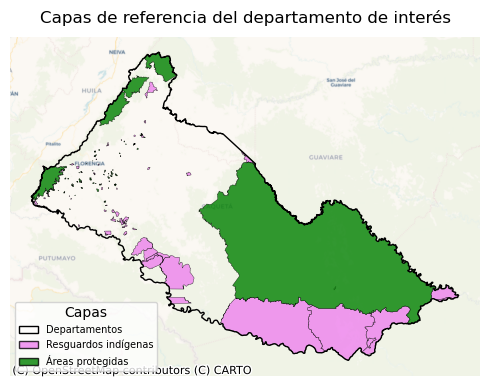

In [7]:
visualization_tools.visualize_geospatial_layers(caqueta_4326, resguardos_caqueta_4326, parques_caqueta_4326)

In [8]:
cober_clipped, caqueta_geom = visualization_tools.clip_raster_to_region(caqueta_4326)


✅ Capas  convertidas correctamente en:


# 🗺️ Visualización de las coberturas en el departamento de Caquetá
Este módulo permite visualizar  las coverturas recortadas al departamento de interes. 

In [9]:
map = visualization_tools.visualizacion_raster_dep(palette,caqueta_geom,cober_clipped,"2020")

map

Map(center=[0.8295979759918997, -73.96631873639063], controls=(WidgetControl(options=['position', 'transparent…